## TOPIC: CREDIT FRAUD DETECTION

#### 

IMPORTING ALL THE NECESSARY PYTHON LIBRARIES FOR CREATION OF THIS PROJECT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 1.LOAD DATASET

READ AND LOAD THE REQUIRED DATASET

In [27]:
fraud_creditcard= pd.read_csv('card_transdata.csv.zip')
fraud_creditcard

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


ACCESSING THE HEAD AND TAIL OF THE DATASET 

In [28]:
fraud_creditcard.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [29]:
fraud_creditcard.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [30]:
fraud_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [31]:
fraud_creditcard.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


CALCULATING THE NUMBER OF ROWS AND COLUMNS INSIDE THE DATASET

In [32]:
rows,col=df.shape
print(f"Number of rows : {rows} \nNumber of Columns :{col}")

Number of rows : 1000000 
Number of Columns :8


### 2. DATA CLEANING & PROCESSING

###### 

### 2.1 CHECKING THE NULL-VALUES

In [33]:
fraud_creditcard.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### 2.2 CHECKING THE DUPLICATES

CHECKING THE MISSING VALUES

In [34]:
fraud_creditcard[fraud_creditcard.duplicated(subset=['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price',
                         'repeat_retailer','used_chip','used_pin_number','online_order','fraud'],keep=False)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [35]:
#Sum of Duplicate Records

fraud_creditcard.duplicated().sum()

0

## 3.Exploratory Data Analysis

In [36]:
fraud_creditcard.nunique().sort_values()

repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
dtype: int64

In [37]:
print(f" Unique values 'repeat_retailer' {fraud_creditcard.repeat_retailer.unique()}.")
print(f" Unique values 'used_chip' {fraud_creditcard.used_chip.unique()}.")
print(f" Unique values 'used_pin_number' {fraud_creditcard.used_pin_number.unique()}.")
print(f" Unique values 'online_order ' {fraud_creditcard.online_order.unique()}.")

 Unique values 'repeat_retailer' [1. 0.].
 Unique values 'used_chip' [1. 0.].
 Unique values 'used_pin_number' [0. 1.].
 Unique values 'online_order ' [0. 1.].


### 3.1 Visualization

<AxesSubplot:>

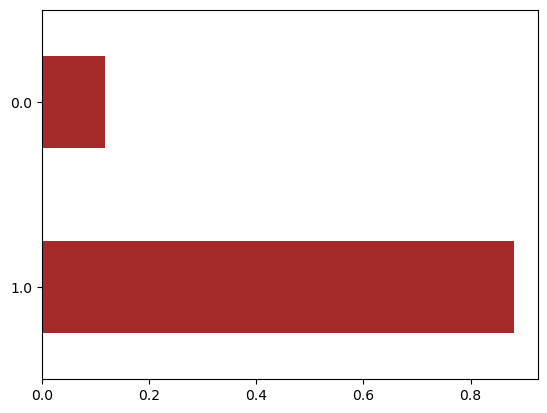

In [87]:
fraud_creditcard.repeat_retailer.value_counts(1).plot.barh(color='brown')

<AxesSubplot:>

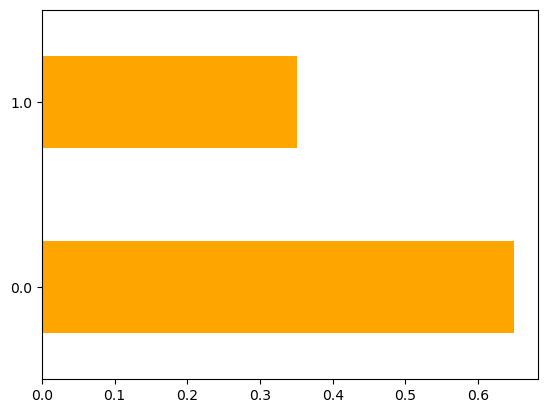

In [85]:
fraud_creditcard.used_chip.value_counts(1).plot.barh(color='orange')

<AxesSubplot:>

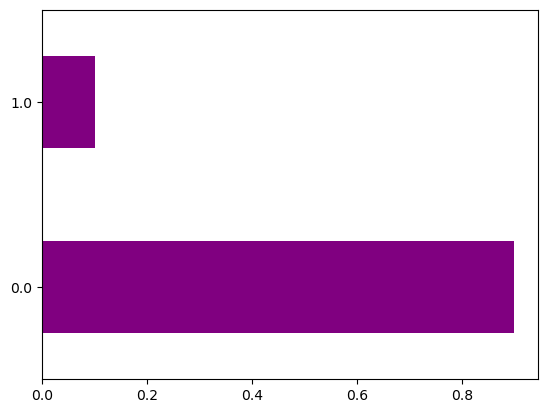

In [83]:
fraud_creditcard.used_pin_number.value_counts(1).plot.barh(color='purple')

<AxesSubplot:>

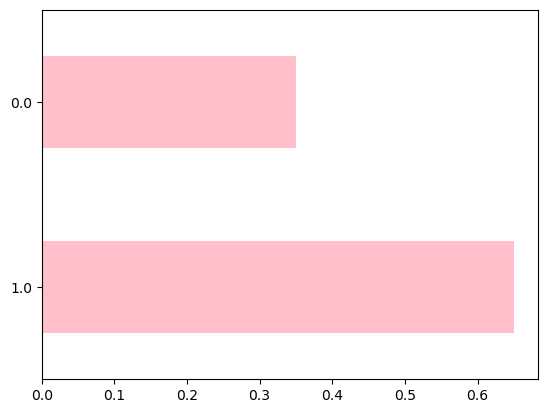

In [88]:
fraud_creditcard.online_order.value_counts(1).plot.barh(color='pink')

### 3.2 Statistical Methods to Analyze Data Distributions

In [42]:
from scipy.stats import skew

aggr_func = {
    'distance_from_home': ['mean', 'median', 'std', 'min', 'max', skew],
    'distance_from_last_transaction': ['mean', 'median', 'std', 'min', 'max', skew],
    'ratio_to_median_purchase_price':['mean', 'median', 'std', 'min', 'max', skew]
}

fraud_creditcard.groupby(['fraud']).agg(aggr_func)

distance_from_home                                                 \
                    mean     median         std       min           max   
fraud                                                                     
0.0            22.832976   9.673847   52.828655  0.004874   8777.136420   
1.0            66.261876  15.454219  134.391608  0.025847  10632.723672   

                 distance_from_last_transaction                       \
            skew                           mean    median        std   
fraud                                                                  
0.0    21.821767                       4.301391  0.985074  22.472359   
1.0    12.062217                      12.712185  1.157631  47.997697   

                                          ratio_to_median_purchase_price  \
            min           max        skew                           mean   
fraud                                                                      
0.0    0.000118  11851.104565  197.728867                       1.423642   
1.0    0.000407   2160.499922   12.609578                       6.006323   

                                                            
         median       std       min         max       skew  
fraud                                                       
0.0    0.913950  1.946152  0.004399  267.802942  11.780211  
1.0    5.071294  5.564320  0.011966  266.689692   5.328827

In [89]:
fraud_creditcard_fraud = fraud_creditcard.loc[df['fraud']==1]
fraud_creditcard_non_fraud = fraud_creditcard.loc[df['fraud']==0]

In [90]:
fraud_creditcard['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [44]:
X = fraud_creditcard.drop('fraud', axis = 1)
y = fraud_creditcard['fraud']

In [46]:
fraud_creditcard_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [47]:
fraud_creditcard_non_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [51]:
# shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (800000, 7)
X_test: (200000, 7)
y_train: (800000,)
y_test: (200000,)


In [64]:
model=LogisticRegression()

In [61]:

classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [92]:
#accuracy on training data
y_predict=classifier.predict(X_test)

In [66]:
Results=pd.DataFrame({'Actual':y_test,'Predictions':y_predict})
Results.head(10)

,Actual,Predictions
276826,0.0,0.0
849425,0.0,0.0
504499,0.0,0.0
601054,0.0,0.0
980221,1.0,0.0
409364,0.0,0.0
653769,0.0,0.0
846412,0.0,0.0
771284,0.0,0.0
372778,0.0,0.0


In [93]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.958654


In [94]:
y_train_predict=classifier.predict(X_train)
print(accuracy_score(y_train,y_train_predict))

0.958512
